# Programming Exercise 8: Anomaly Detection and Recommender Systems
# 2 Recommender Systems
## 2.1 Movie ratings dataset

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex8_movies.mat')
print data.keys()

['Y', 'R', '__version__', '__header__', '__globals__']


In [2]:
Y = data['Y']
R = data['R']
print Y.shape, R.shape

(1682, 943) (1682, 943)


In [3]:
print Y[:3, :3]
print R[:3, :3]

[[5 4 0]
 [3 0 0]
 [4 0 0]]
[[1 1 0]
 [1 0 0]
 [1 0 0]]


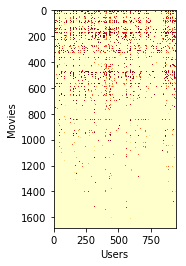

In [4]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

plt.imshow(Y, cmap='YlOrRd')
plt.ylabel('Movies')
plt.xlabel('Users');

## 2.2 Collaborative filtering learning algorithm

In [5]:
params = scipy.io.loadmat('../matlab/ex8_movieParams.mat')
print params.keys()

['num_features', '__header__', '__globals__', 'num_users', 'X', 'Theta', '__version__', 'num_movies']


In [6]:
(num_features, num_users, num_movies) = (params['num_features'][0,0],
                                         params['num_users'][0,0],
                                         params['num_movies'][0,0])
X = params['X']
Theta = params['Theta']
print num_features, num_users, num_movies
print X.shape, Theta.shape

10 943 1682
(1682, 10) (943, 10)


### 2.2.1 Collaborative filtering cost function
$J(x^{(1)},\ldots,x^{(n_m)},\theta^{(1)},\ldots,\theta^{(n_u)}) = \frac{1}{2} \sum_{(i, j): r(i, j)=1} ((\theta^{(j)})^T x^{(i)} - y^{(i,j)})^2$

In [7]:
def cofi_cost(params, Y, R, num_users, num_movies, num_features, lambda_):
    n = num_movies * num_features
    X = np.reshape(params[:n], (num_movies, num_features))
    Theta = np.reshape(params[n:], (num_users, num_features))
    ### YOUR CODE HERE ###





    ######################
    return J, np.concatenate((X_grad.flatten(), Theta_grad.flatten()))

In [8]:
num_users_ = 4
num_movies_ = 5
num_features_ = 3
X_ = X[:num_movies_, :num_features_]
Theta_ = Theta[:num_users_, :num_features_]
Y_ = Y[:num_movies_, :num_users_]
R_ = R[:num_movies_, :num_users_]
params_ = np.concatenate((X_.flatten(), Theta_.flatten()))
J, grad =  cofi_cost(params_, Y_, R_, num_users_, num_movies_, num_features_, 0)
print J

22.2246037257


### 2.2.2 Collaborative filtering gradient
$\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j: r(i, j) = 1} ((\theta^{(j)})^T x^{(i)} - y^{(i, j)}) \theta_k^{(j)}$

$\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{j: r(i, j) = 1} ((\theta^{(j)})^T x^{(i)} - y^{(i, j)}) x_k^{(i)}$

In [9]:
lambda_ = 0
cost = lambda params: cofi_cost(params, Y_, R_,
                                num_users_, num_movies_, num_features_, lambda_)[0]
n = num_movies_ * num_features_ + num_users_ * num_features_
correct_grad = np.zeros(n)
eps = 1e-4
for i in range(n):
    delta = np.zeros(n)
    delta[i] = eps
    correct_grad[i] = 0.5 / eps * (cost(params_ + delta) - cost(params_ - delta))

print max(abs(grad - correct_grad))

1.39457334569e-11


## 2.2.3 Regularized cost function
$J(x^{(1)},\ldots,x^{(n_m)},\theta^{(1)},\ldots,\theta^{(n_u)}) = \frac{1}{2} \sum_{(i, j): r(i, j)=1} ((\theta^{(j)})^T x^{(i)} - y^{(i,j)})^2 + \frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^{n} (\theta_k^{(j)})^2 + \frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^{n} (x_k^{(i)})^2$

In [10]:
lambda_ = 1.5
J, grad =  cofi_cost(params_, Y_, R_, num_users_, num_movies_, num_features_, lambda_)
print J

31.3440562443


### 2.2.4 Regularized gradient
$\frac{\partial J}{\partial x_k^{(i)}} = \sum_{j: r(i, j) = 1} ((\theta^{(j)})^T x^{(i)} - y^{(i, j)}) \theta_k^{(j)} + \lambda x_k^{(i)}$

$\frac{\partial J}{\partial \theta_k^{(j)}} = \sum_{j: r(i, j) = 1} ((\theta^{(j)})^T x^{(i)} - y^{(i, j)}) x_k^{(i)} + \lambda \theta_k^{(j)}$

In [11]:
correct_grad = np.zeros(n)
for i in range(n):
    delta = np.zeros(n)
    delta[i] = eps
    correct_grad[i] = 0.5 / eps * (cost(params_ + delta) - cost(params_ - delta))

print max(abs(grad - correct_grad))

1.98383531824e-11


## 2.3 Learning movie recommendations

In [12]:
movies = []
with open('../matlab/movie_ids.txt') as f:
    for line in f:
        fields = line.split()
        movies.append(' '.join(fields[1:]))
print movies[:5]

['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copycat (1995)']


In [13]:
my_ratings = np.zeros(num_movies)
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

for i in range(num_movies):
    if my_ratings[i] > 0:
        print 'Rated %d for %s' % (my_ratings[i], movies[i])

Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


In [14]:
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings > 0, R))

In [15]:
def normalize_ratings(Y, R):
    m, _ = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)
    for i in range(m):
        nonzeros = R[i, :] > 0
        Ymean[i] = Y[i, nonzeros].mean()
        Ynorm[i, nonzeros] = Y[i, nonzeros] - Ymean[i]
    return Ynorm, Ymean

Ynorm, Ymean = normalize_ratings(Y, R)
num_movies, num_users = Y.shape
num_features = 10

In [16]:
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_params = np.concatenate((X.flatten(), Theta.flatten()))

In [17]:
from scipy.optimize import fmin_cg

lambda_ = 10
# This is inefficient!
cost = lambda params: cofi_cost(params, Ynorm, R,
                                num_users, num_movies, num_features, lambda_)[0]
grad = lambda params: cofi_cost(params, Ynorm, R,
                                num_users, num_movies, num_features, lambda_)[1]
params = fmin_cg(cost, initial_params, fprime=grad, maxiter=100)

         Current function value: 38959.112341
         Iterations: 100
         Function evaluations: 150
         Gradient evaluations: 150


In [18]:
n = num_movies * num_features
X = np.reshape(params[:n], (num_movies, num_features))
Theta = np.reshape(params[n:], (num_users, num_features))
p = np.dot(X, Theta.T)
my_predictions = p[:,0] + Ymean

In [19]:
for i in (-my_predictions).argsort()[:20]:
    print 'Predicting rating %.1f for movie %s' % (my_predictions[i], movies[i])

Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)
Predicting rating 4.6 for movie Pather Panchali (1955)
Predicting rating 4.6 for movie Star Wars (1977)
Predicting rating 4.6 for movie Shawshank Redemption, The (1994)
Predicting rating 4.5 for movie Maya Lin: A Strong Clear Vision (1994)
Predicting rating 4.5 for movie Wrong Trousers, The (1993)
Predicting rating 4.5 for movie Anna (1996)
Predicting rating 4.5 for movie Som